# Housing Project
Authors: Jake Parker, Ajith Kumar
<br>
GitHub: https://github.com/jmparker4/HousingDataProject

### All Imports

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Hypothesis:
It feels like it is becoming harder and harder to by a house. Therefor we want to look into housing data to see if there is factual number to back it up. 

## Objective:
The Goal of our reseacher was to see if the speculations of it being harder to buy a house is factually true using certain metrics.

### Our Data:

#### Housing Data:
The main source of housing data was taken from the US Federal Reserve of St. Louis. Some of the data had to be scraped due to the nature of the FED's website while others we could just download from. This data is collected by the department from several govermental bodies such as the US Census bureau.


#### Income: 
The main source of income data was taken from the US Federal Reserve of St. Louis. The data is collected by the department with input from several governmental bodies such as the US Census bureau and the other 11 Federal Reserve branches across the US for a complete dataset of US median household income. 

#### Interest: 
The interest data was taken from the Federal Reserve of Minneapolis. It is comprised of historical data from the modern US consumer price index. 


### Gathering the Data:
This data was gathered from both webscrapping of govermental websites and also downloading premade data

In [ ]:
# An example of the scraper used to download data from the feds Median income data 
results = {}
year = 1963
month = 1
for x in range(1,200):

    print(year,month,end = '\r')
    if month == 1:
        data = requests.get('https://fred.stlouisfed.org/release/tables?rid=97&eid=206085&od='+str(year)+'-0'+str(month)+'-01#')
        month = 4
    elif month == 4:
        data = requests.get('https://fred.stlouisfed.org/release/tables?rid=97&eid=206085&od='+str(year)+'-0'+str(month)+'-01#')
        month = 7
    elif month ==7:
        data = requests.get('https://fred.stlouisfed.org/release/tables?rid=97&eid=206085&od='+str(year)+'-0'+str(month)+'-01#')
        month = 10
    elif month == 10:
        data = requests.get('https://fred.stlouisfed.org/release/tables?rid=97&eid=206085&od='+str(year)+'-'+str(month)+'-01#')
        month = 1
        year += 1
    tmp =[] 
    soup = BeautifulSoup(data.text)
    soup= soup.find_all('td', {'class': 'fred-rls-elm-vl-td'})
    tmp.append(soup[3].get_text().replace(' ','').replace('\n',''))
    tmp.append(soup[6].get_text().replace(' ','').replace('\n',''))
    tmp.append(soup[9].get_text().replace(' ','').replace('\n',''))
    tmp.append(soup[12].get_text().replace(' ','').replace('\n',''))
    results[str(year)+'-'+str(month)+'-1']= tmp
    time.sleep(.5)
results
    

df = pd.DataFrame.from_dict(results).T
df.columns = ['MW','NE','PS','PW']
df

In [28]:
#State income with state adjusted income based on inflation rates
dfStates = pd.read_excel('CountyIncBreakdown.xlsx')
dfStates.head()

,State,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,43850.00,44910.00,46110.00,46010.0,44850.00,45840.00,47970.00,48250.0,49880.00,...,53900.00,53970.00,58050.00,51140.00,53880.00,56660.00,59980.00,56660.00,64010.00,61650.0
1,Alabama adj,93707.45,94041.54,94940.49,93860.4,89834.55,89938.08,91814.58,89745.0,90681.84,...,72279.90,70646.73,74768.40,65101.22,67727.16,71164.96,74555.14,69238.52,76683.98,72747.0
2,Alaska,81970.00,85210.00,75580.00,77480.0,74430.00,77550.00,80710.00,80490.0,80790.00,...,72690.00,79030.00,88910.00,81800.00,90920.00,90860.00,91960.00,90860.00,89290.00,84260.0
3,Alaska adj,175169.89,178429.74,155619.22,158059.2,149083.29,152153.10,154478.94,149711.4,146876.22,...,97477.29,103450.27,114516.08,104131.40,114286.44,114120.16,114306.28,111030.92,106969.42,99426.8
4,Arizona,54270.00,58500.00,61460.00,62360.0,59430.00,61490.00,60020.00,60920.0,56740.00,...,61540.00,58410.00,64540.00,59580.00,63250.00,68510.00,70390.00,68510.00,80500.00,75620.0


In [16]:
url = r'C:\Users\Ajith\OneDrive\Desktop\HousingDataProject\InflationRates.xlsx'

In [29]:
#Inflation rate data loading and dataframe assignment
#Multiplied by 100 to show as a percent rather than a decimal for graphical purposes
dfInflationRates = pd.read_excel('InflationRates.xlsx')
dfInflationRates['Inflation Rate']  = dfInflationRates['Inflation Rate']*100
dfInflationRates.head()

,Year,Inflation Rate
0,1984,4.3
1,1985,3.5
2,1986,1.9
3,1987,3.7
4,1988,4.1


Mapping States and adjusted states based on FED Data regional breakdown


In [30]:
# Mapping states to regions for graphical breakdown based on FED data 
us_regions = {
    "West": ["California", "Montana", "Idaho", "Nevada", "Wyoming", "Utah", "Arizona", "Colorado", "New Mexico", "Hawaii", "Alaska", "Oregon", "Washington"],
    "West Adj": ["California adj", "Montana adj", "Idaho adj", "Nevada adj", "Wyoming adj", "Utah adj", "Arizona adj", "Colorado adj", "New Mexico adj", "Hawaii adj", "Alaska adj", "Oregon adj", "Washington adj"],
    "South": ["Texas", "Oklahoma", "Arkansas", "Louisiana", "Mississippi", "Alabama", "Tennessee", "Kentucky", "Florida", "Georgia", "South Carolina", "North Carolina", "Virginia", "West Virginia", "Maryland", "Delaware", "Washington, D.C."],
    "South Adj": ["Texas adj", "Oklahoma adj", "Arkansas adj", "Louisiana adj", "Mississippi adj", "Alabama adj", "Tennessee adj", "Kentucky adj", "Florida adj", "Georgia adj", "South Carolina adj", "North Carolina adj", "Virginia adj", "West Virginia adj", "Maryland adj", "Delaware adj", "Washington, D.C. adj"],
    "MidWest": ["North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri", "Wisconsin", "Illinois", "Michigan", "Indiana", "Ohio"],
    "MidWest Adj": ["North Dakota adj", "South Dakota adj", "Nebraska adj", "Kansas adj", "Minnesota adj", "Iowa adj", "Missouri adj", "Wisconsin adj", "Illinois adj", "Michigan adj", "Indiana adj", "Ohio adj"],
    "NorthEast": ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"],
    "NorthEast Adj": ["Maine adj", "New Hampshire adj", "Vermont adj", "Massachusetts adj", "Rhode Island adj", "Connecticut adj", "New York adj", "Pennsylvania adj", "New Jersey adj"]
}
print(us_regions)

{'West': ['California', 'Montana', 'Idaho', 'Nevada', 'Wyoming', 'Utah', 'Arizona', 'Colorado', 'New Mexico', 'Hawaii', 'Alaska', 'Oregon', 'Washington'], 'West Adj': ['California adj', 'Montana adj', 'Idaho adj', 'Nevada adj', 'Wyoming adj', 'Utah adj', 'Arizona adj', 'Colorado adj', 'New Mexico adj', 'Hawaii adj', 'Alaska adj', 'Oregon adj', 'Washington adj'], 'South': ['Texas', 'Oklahoma', 'Arkansas', 'Louisiana', 'Mississippi', 'Alabama', 'Tennessee', 'Kentucky', 'Florida', 'Georgia', 'South Carolina', 'North Carolina', 'Virginia', 'West Virginia', 'Maryland', 'Delaware', 'Washington, D.C.'], 'South Adj': ['Texas adj', 'Oklahoma adj', 'Arkansas adj', 'Louisiana adj', 'Mississippi adj', 'Alabama adj', 'Tennessee adj', 'Kentucky adj', 'Florida adj', 'Georgia adj', 'South Carolina adj', 'North Carolina adj', 'Virginia adj', 'West Virginia adj', 'Maryland adj', 'Delaware adj', 'Washington, D.C. adj'], 'MidWest': ['North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa'

In [31]:
# Creating a regions column for each state and adjusted state for identification
state_to_region = {}
for region, states in us_regions.items():
    for state in states:
        state_to_region[state] = region

# Map each state to its region 
dfStates['Region'] = dfStates['State'].map(state_to_region)
dfStates.head()

,State,1984,1985,1986,1987,1988,1989,1990,1991,1992,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region
0,Alabama,43850.00,44910.00,46110.00,46010.0,44850.00,45840.00,47970.00,48250.0,49880.00,...,53970.00,58050.00,51140.00,53880.00,56660.00,59980.00,56660.00,64010.00,61650.0,South
1,Alabama adj,93707.45,94041.54,94940.49,93860.4,89834.55,89938.08,91814.58,89745.0,90681.84,...,70646.73,74768.40,65101.22,67727.16,71164.96,74555.14,69238.52,76683.98,72747.0,South Adj
2,Alaska,81970.00,85210.00,75580.00,77480.0,74430.00,77550.00,80710.00,80490.0,80790.00,...,79030.00,88910.00,81800.00,90920.00,90860.00,91960.00,90860.00,89290.00,84260.0,West
3,Alaska adj,175169.89,178429.74,155619.22,158059.2,149083.29,152153.10,154478.94,149711.4,146876.22,...,103450.27,114516.08,104131.40,114286.44,114120.16,114306.28,111030.92,106969.42,99426.8,West Adj
4,Arizona,54270.00,58500.00,61460.00,62360.0,59430.00,61490.00,60020.00,60920.0,56740.00,...,58410.00,64540.00,59580.00,63250.00,68510.00,70390.00,68510.00,80500.00,75620.0,West


In [32]:
# Reshaping data for categorization of regions later
dfReshaped = pd.melt(dfStates, id_vars=['State', 'Region'], var_name='Year', value_name='Income')
dfReshaped['Year'] = dfReshaped['Year'].astype(int)
dfReshaped.head()

,State,Region,Year,Income
0,Alabama,South,1984,43850.00
1,Alabama adj,South Adj,1984,93707.45
2,Alaska,West,1984,81970.00
3,Alaska adj,West Adj,1984,175169.89
4,Arizona,West,1984,54270.00


Adding Inflation Rates to the Regional Income breakdown

In [33]:
# Calculating average income per region using groupby on Region and year column and resetting the indeces.
# Pivoting table for easy visualization 
avg_income_per_region = dfReshaped.groupby(['Year', 'Region'])['Income'].mean().reset_index()

# Pivot the dataframe to get years as columns
average_income_df = avg_income_per_region.pivot(index='Region', columns='Year', values='Income')

# Creating a row for inflation rates based on year
inflation_row = dfInflationRates.set_index('Year').T
inflation_row.index = ['Inflation Rate']

# Combine the average income DataFrame with interest rates
combined_df = pd.concat([average_income_df, inflation_row])

combined_cleaned_df = combined_df.dropna(axis=1, how='all', subset=combined_df.index.drop('Inflation Rate'))

# Display the combined DataFrame
combined_cleaned_df.head(10)

Year,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
MidWest,55865.833333,55300.000000,57310.000000,57514.166667,59309.166667,59510.833333,58786.666667,57365.833333,57622.500000,57478.333333,...,63264.166667,63920.000000,66577.500000,67384.166667,69797.500000,70641.666667,71618.333333,70641.666667,78383.333333,77280.833333
MidWest Adj,119385.285833,115798.200000,118001.290000,117328.900000,118796.260833,116760.255000,112517.680000,106700.450000,104757.705000,102771.260000,...,84837.247500,83671.280000,85751.820000,85780.044167,87735.457500,88725.933333,89021.588333,86324.116667,93903.233333,91191.383333
NorthEast,61307.777778,63792.222222,66610.000000,67557.777778,70252.222222,72960.000000,69782.222222,66934.444444,66440.000000,64912.222222,...,71450.000000,72126.666667,74506.666667,74254.444444,76547.777778,78466.666667,78956.666667,78466.666667,88975.555556,86704.444444
NorthEast Adj,131014.721111,133580.913333,137149.990000,137817.866667,140715.201111,143147.520000,133563.173333,124498.066667,120787.920000,116063.053333,...,95814.450000,94413.806667,95964.586667,94525.907778,96220.556667,98554.133333,98143.136667,95886.266667,106592.715556,102311.244444
South,51542.500000,51275.625000,53020.625000,54951.250000,54682.500000,55009.375000,54543.750000,53456.875000,53102.500000,53168.750000,...,59296.875000,58342.500000,58971.875000,58930.625000,60445.000000,62816.250000,65176.875000,62816.250000,70430.000000,68426.250000
South Adj,106767.369333,104222.568000,106321.269333,108485.840000,105857.214667,104977.464000,101172.764000,96977.920000,94260.876000,92424.104000,...,77025.252000,73677.501333,73713.957333,72201.165333,73578.914000,76746.624000,78394.352667,74669.088000,81302.669333,77716.373333
West,61200.769231,60436.153846,61313.076923,62224.615385,61366.153846,63026.153846,62911.538462,61804.615385,62882.307692,63653.076923,...,65446.153846,66363.076923,70126.153846,69566.153846,72397.692308,75170.000000,76210.000000,75170.000000,82741.538462,80405.384615
West Adj,130941.113333,127658.965000,127021.425833,126582.000000,123244.590000,123566.760000,120795.730000,115612.950000,115000.620000,115022.040000,...,87367.267500,86318.732500,88968.600000,88791.750000,90862.245000,95018.493333,95351.565833,92446.336667,99978.091667,95529.850000
Inflation Rate,4.300000,3.500000,1.900000,3.700000,4.100000,4.800000,5.400000,4.200000,3.000000,3.000000,...,3.200000,2.100000,1.500000,1.600000,0.100000,1.300000,2.100000,2.400000,1.800000,1.200000


In [34]:
# Transposing for easier graphical use
combined_cleaned_df_transposed = combined_cleaned_df.T
combined_cleaned_df_transposed.head()

,MidWest,MidWest Adj,NorthEast,NorthEast Adj,South,South Adj,West,West Adj,Inflation Rate
Year,,,,,,,,,
1984,55865.833333,119385.285833,61307.777778,131014.721111,51542.500,106767.369333,61200.769231,130941.113333,4.3
1985,55300.000000,115798.200000,63792.222222,133580.913333,51275.625,104222.568000,60436.153846,127658.965000,3.5
1986,57310.000000,118001.290000,66610.000000,137149.990000,53020.625,106321.269333,61313.076923,127021.425833,1.9
1987,57514.166667,117328.900000,67557.777778,137817.866667,54951.250,108485.840000,62224.615385,126582.000000,3.7
1988,59309.166667,118796.260833,70252.222222,140715.201111,54682.500,105857.214667,61366.153846,123244.590000,4.1


In [35]:
# Creating a year column so that axes can be set using column identifiers
combined_cleaned_df_transposed = combined_cleaned_df_transposed.reset_index().rename(columns={'index': 'Year'})
combined_cleaned_df_transposed['Year'] = combined_cleaned_df_transposed['Year'].astype(int)
combined_cleaned_df_transposed.head()

,Year,MidWest,MidWest Adj,NorthEast,NorthEast Adj,South,South Adj,West,West Adj,Inflation Rate
0,1984,55865.833333,119385.285833,61307.777778,131014.721111,51542.500,106767.369333,61200.769231,130941.113333,4.3
1,1985,55300.000000,115798.200000,63792.222222,133580.913333,51275.625,104222.568000,60436.153846,127658.965000,3.5
2,1986,57310.000000,118001.290000,66610.000000,137149.990000,53020.625,106321.269333,61313.076923,127021.425833,1.9
3,1987,57514.166667,117328.900000,67557.777778,137817.866667,54951.250,108485.840000,62224.615385,126582.000000,3.7
4,1988,59309.166667,118796.260833,70252.222222,140715.201111,54682.500,105857.214667,61366.153846,123244.590000,4.1


Creating Average and Adjusted US income based on all 4 region data averaged

In [36]:
# Creating columns for average US and adjusted US income which is the mean of the 4 regions of the respective states
combined_cleaned_df_transposed['Average US Income'] = combined_cleaned_df_transposed[['MidWest', 'NorthEast', 'South', 'West']].mean(axis=1)
combined_cleaned_df_transposed['Average Adjusted US Income'] = combined_cleaned_df_transposed[['MidWest Adj', 'NorthEast Adj', 'South Adj', 'West Adj']].mean(axis=1)
combined_cleaned_df_transposed.head()


,Year,MidWest,MidWest Adj,NorthEast,NorthEast Adj,South,South Adj,West,West Adj,Inflation Rate,Average US Income,Average Adjusted US Income
0,1984,55865.833333,119385.285833,61307.777778,131014.721111,51542.500,106767.369333,61200.769231,130941.113333,4.3,57479.220085,122027.122403
1,1985,55300.000000,115798.200000,63792.222222,133580.913333,51275.625,104222.568000,60436.153846,127658.965000,3.5,57701.000267,120315.161583
2,1986,57310.000000,118001.290000,66610.000000,137149.990000,53020.625,106321.269333,61313.076923,127021.425833,1.9,59563.425481,122123.493792
3,1987,57514.166667,117328.900000,67557.777778,137817.866667,54951.250,108485.840000,62224.615385,126582.000000,3.7,60561.952457,122553.651667
4,1988,59309.166667,118796.260833,70252.222222,140715.201111,54682.500,105857.214667,61366.153846,123244.590000,4.1,61402.510684,122153.316653


In [37]:
#Creating a Excel instance From the local file Cleaned_Data.xlsx 
#File can be found on github: https://github.com/jmparker4/HousingDataProject
master = pd.ExcelFile('Cleaned_Data.xlsx')

#Showing a Preview of the Average_US Tab
average_house = master.parse('AveragePrice')
print('Average_Housing_Pricing')
print(average_house.head(1))
#Showing a Preview of the Median_US Tab 
print('\n')
print('Median_Housing_Pricing')
median_house = master.parse('MedianPrice')
print(median_house.head(1))

Average_Housing_Pricing
  observation_date  Average_MW  Average_NE  Average_PS  Average_PW  \
0       1963-01-01           0           0           0           0   

   Average_US  Percent_Change_From Start  Percent_Change_Q  inflation  \
0       19300                        0.0               0.0      0.012   

   compound_Rate  Inflation_MW  Inflation_NE  Inflation_PS  Inflation_PW  \
0          3.374           0.0           0.0           0.0           0.0   

   Inflation_US  
0       65118.2  


Median_Housing_Pricing
        date  Median_MW  Median_NE  Median_PS  Median_PW  Median_US  \
0 1963-01-01      17500      20800      16800      18000      17800   

   Percent_Change_From_Start  Percentage_From_Q  inflation  compound_Rate  \
0                        0.0                0.0      0.012          3.374   

   Inflation_MW  Inflation_NE  Inflation_PS  Inflation_PW  Inflation_US  
0       59045.0       70179.2       56683.2       60732.0       60057.2  


### Feature Manipluation
**** Write Description of each feature we created the have the code down below ****
<br>
Average_US =  The average housing price for a single single year across the USA
<br>
Median_US = The median housing price for a single single year across the USA
<br>
buying_multiplier = Price of the home diveded by average income 
<br> 
Inflation_MW/Inflation_NE/Inflation_PS/Inflation_PW/Inflation_US = This is the inflation adjusted housing price. (Price*compounded Inflation)

In [38]:
#How buying Power Was calculated 
import numpy as np
results = [] 
tmp= ''
prices =[] 
for x, y in zip(average_house['Average_US'],average_house['observation_date']):
    if tmp == '':
        tmp = str(y).split('-')[0]
        prices.append(x)
    elif str(y).split('-')[0] != tmp:
        results.append([tmp,np.average(prices)])
        prices = []
        tmp = ''
    else:
        prices.append(x)
TheMaster_Average = pd.DataFrame(results,columns  =['Year','Average_HousingPrice'])
income_US = pd.read_excel('INCDATA.xlsx')
results = []
for x,y in zip(income_US['Year'], income_US['Income']):
    results.append(round(TheMaster_Average[TheMaster_Average['Year'] == str(x)]['Average_HousingPrice'].values[0]/y,4))
income_US['buying_multiplier'] = results
income_US['Average_HousingPrice'] = [round(TheMaster_Average[TheMaster_Average['Year'] == str(x)]['Average_HousingPrice'].values[0],2) for x in income_US['Year']]
income_US.head(5)

,Year,Income,buying_multiplier,Average_HousingPrice
0,2022,74580,7.0010,522133.33
1,2021,70780,6.5616,464433.33
2,2020,68010,5.7276,389533.33
3,2019,68700,5.5507,381333.33
4,2018,63180,6.0953,385100.00


### Graphing and observations


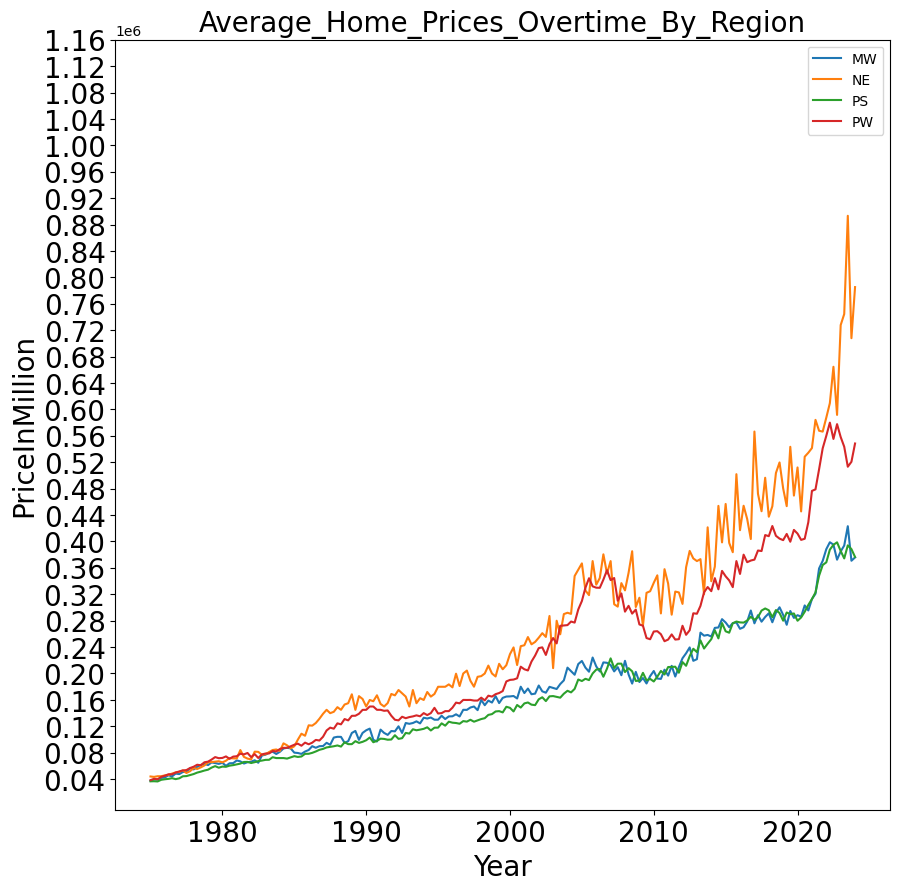

In [39]:
#### Median Housing Prices By Region
graph2 = plt.figure(figsize =(10,10))
plt.plot(median_house.iloc[48:]['date'],median_house.iloc[48:]['Median_MW'], label = 'MW')
plt.plot(median_house.iloc[48:]['date'],median_house.iloc[48:]['Median_NE'], label = 'NE')
plt.plot(median_house.iloc[48:]['date'],median_house.iloc[48:]['Median_PS'], label = 'PS')
plt.plot(median_house.iloc[48:]['date'],median_house.iloc[48:]['Median_PW'], label = 'PW')
plt.title('Average_Home_Prices_Overtime_By_Region',fontsize = 20)
plt.xlabel('Year',fontsize = 20)
plt.ylabel('PriceInMillion',fontsize = 20)
ticks = [x for x in range(1,1_200_000) if x%40_000 == 0 ]
plt.yticks(ticks, fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend()
plt.show()

The above graph is showing showing the average housing prices throughout the USA history broken down by region. A few observations that can be made is that the NE has almost always been the most expensive place to live. The other major observation around 2018 housing prices began to grow rappidly!

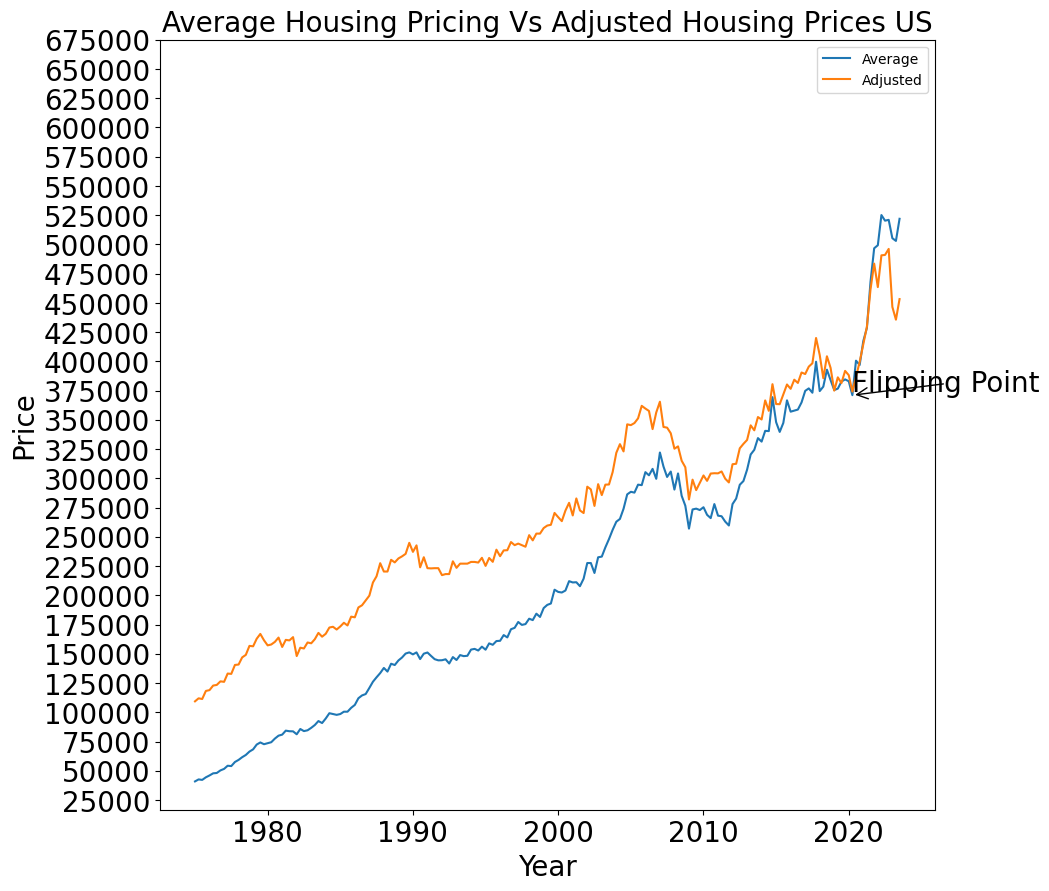

In [40]:
graph2 = plt.figure(figsize =(10,10))
plt.plot(average_house.iloc[48:243]['observation_date'],average_house.iloc[48:243]['Average_US'], label = 'Average')
plt.plot(average_house.iloc[48:243]['observation_date'],median_house.iloc[48:243]['Inflation_US'], label = 'Adjusted')
plt.title('Average Housing Pricing Vs Adjusted Housing Prices US',fontsize = 20)

# Annotate the graph to show difference
x_point = average_house.iloc[229]['observation_date']  # Adjust this to the x-coordinate where you want the annotation
y_point_avg = average_house.iloc[229]['Average_US']  # Y-coordinate of the average line
y_point_med = median_house.iloc[229]['Inflation_US'] 

plt.annotate('Flipping Point', xy=(x_point, y_point_avg), xytext=(x_point, y_point_med),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=20)

plt.xlabel('Year',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
ticks = [x for x in range(1,700_000) if x%25_000 == 0 ]
plt.yticks(ticks, fontsize = 20)
plt.xticks(fontsize = 20)
plt.legend()
plt.show()

The above graph is showing the difference between actual housing prices against the inflation adjusted housing price. One major thing to note is that during 2019 the inflation adjusted housing price is now lower than the actual housing price. This means that housing prices are out growing inflation rappidly and housing prices are not "Normal"

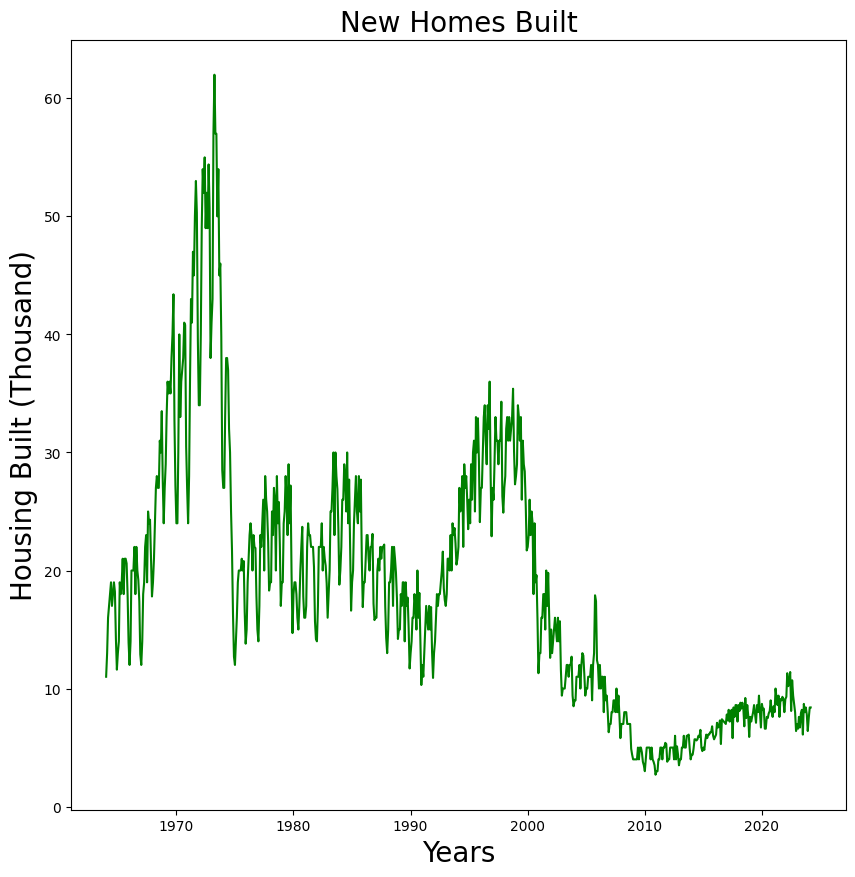

In [41]:
housing = master.parse('NewHouseBuilt_Thousand')
graph2 = plt.figure(figsize =(10,10))
plt.plot(housing.iloc[60:]['DATE'],housing.iloc[60:]['NewHome_Thousand'], color = 'green')
plt.title('New Homes Built',fontsize = 20)
plt.xlabel('Years',fontsize = 20)
plt.ylabel('Housing Built (Thousand)',fontsize = 20)
plt.show()

The above graph is showing the new homes built in the US overtime. One major thing to note is that after the housing building decline of the late 1990, housing building has never recovered. This is problematic due to to the decrease in new homes and the ever growing demand of housing. 

#### Inflation Rates: 
This graph shows the inflation rates over time.
It is shown here as a yearly rate however in reality it should be thought of as compounded year over year

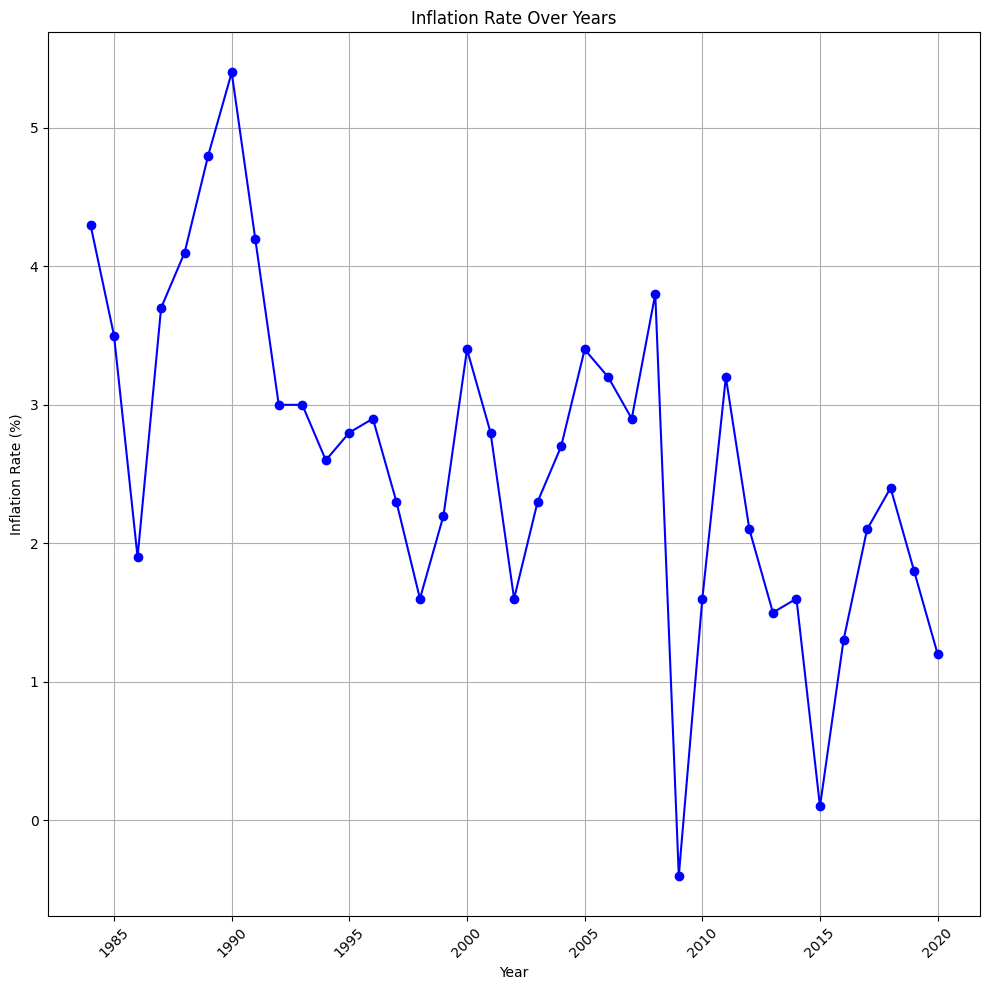

In [42]:
#Graph for inflation
plt.figure(figsize=(10, 10))
plt.plot(dfInflationRates['Year'], dfInflationRates['Inflation Rate'], marker='o', linestyle='-', color='b')
plt.title('Inflation Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

#### Actual vs Adjusted Income of the United States: 
This graph shows the actual vs adjusted incomes of individuals in the United States. 

The adjusted values are derived from the inflation rate dataframe and compounded from the given year up to the target year of 2020.
Ex: Adjusted income for 1990 is calculated by [(1+inflation rate 1984)+(1+inflation rate 1985)+...+(1+inflation rate 1990)]*(income 1990)

The actual incomes are seen to not be increasing according to the compounded inflation rates over time. For example, between 1995 and 2008 before the market crash, inflation rates were conistently 1.5-3% annually, which would mean over this time period the incomes of individuals ideally should have increased at a similar rate overall, however this is not the case. From the year 1995-2008 there was a 9.48% increase in average income nationally with a 37.9% increase in inflation rates.

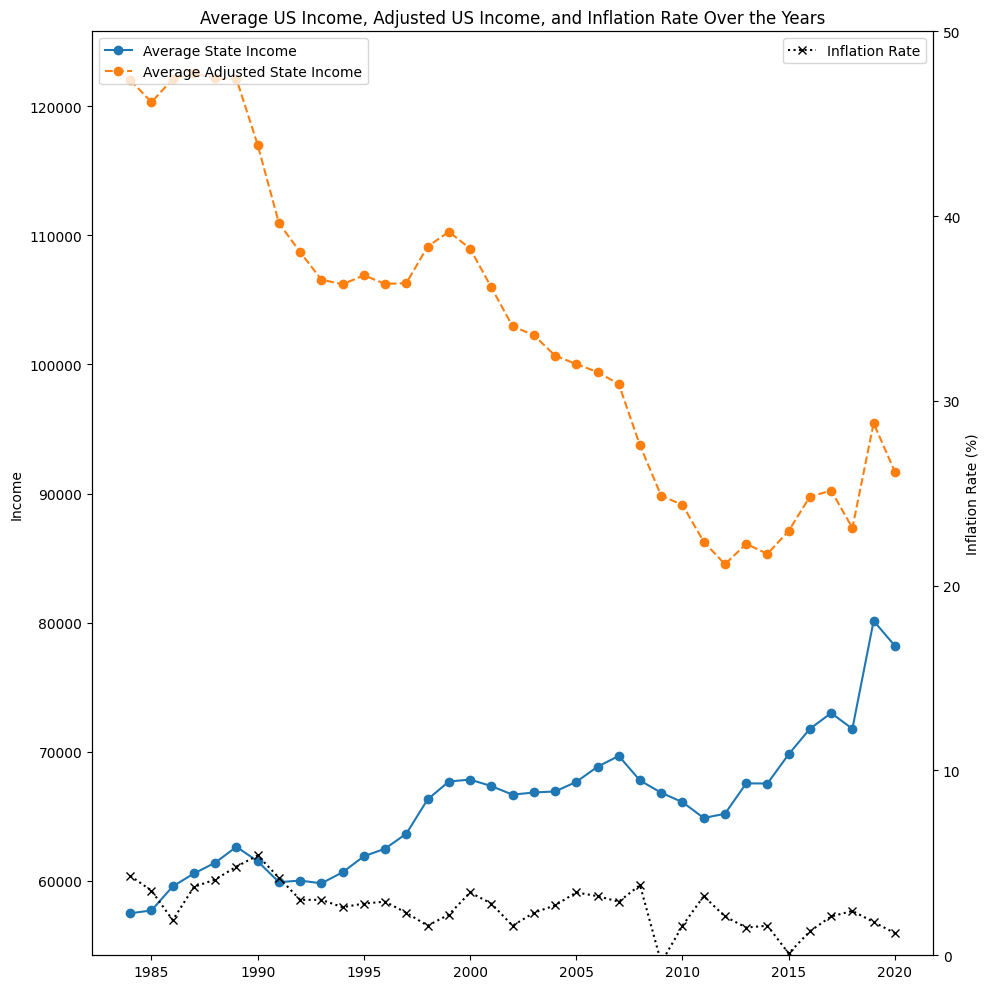

In [46]:
# Income vs Adjusted income of the United States 
plt.figure(figsize=(10, 10))

# Plot average state income
plt.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['Average US Income'], label='Average State Income', marker='o')

# Plot average adjusted state income
plt.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['Average Adjusted US Income'], label='Average Adjusted State Income', linestyle='--', marker='o')

# Plot inflation rate on a secondary y-axis
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['Inflation Rate'], label='Inflation Rate', color='black', linestyle=':', marker='x')
ax2.set_ylabel('Inflation Rate (%)')
ax2.set_ylim(0, 50)  # Adjust this range as necessary

# Set labels and title
plt.xlabel('Year')
ax1.set_ylabel('Income')
plt.title('Average US Income, Adjusted US Income, and Inflation Rate Over the Years')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


This shows the average increase in income compared to the compounded inflation rate during the span of 1995-2008 in a numerical format

In [44]:
# Numerical explanation of graph above from 1995-2008
income_1995 = combined_cleaned_df_transposed.loc[combined_cleaned_df_transposed['Year'] == 1995, 'Average US Income'].values[0]
income_2008 = combined_cleaned_df_transposed.loc[combined_cleaned_df_transposed['Year'] == 2008, 'Average US Income'].values[0]

# Calculate the increase in income
increase = income_2008 - income_1995

# Calculate the percent increase of income for 1995-2008
percent_increase = (increase / income_1995) * 100

print(f"Average US Income in 1995: {income_1995}")
print(f"Average US Income in 2008: {income_2008}")
print(f"Increase in Average US Income from 1995 to 2008: {increase}")
print(f"Percent Increase in Average US Income from 1995 to 2008: {percent_increase:.2f}%")

filtered_inflation_rates = dfInflationRates[(dfInflationRates['Year'] >= 1995) & (dfInflationRates['Year'] <= 2008)]

# Calculate the sum of the inflation rates from 1995-2008
sum_inflation_rates = filtered_inflation_rates['Inflation Rate'].sum()

print(f"Sum of Inflation Rates from 1995 to 2008: {sum_inflation_rates}")

Average US Income in 1995: 61895.864049145304
Average US Income in 2008: 67766.46501068375
Increase in Average US Income from 1995 to 2008: 5870.600961538446
Percent Increase in Average US Income from 1995 to 2008: 9.48%
Sum of Inflation Rates from 1995 to 2008: 37.9


This shows the average increase in income compared to the compounded inflation rate during the span of 1995-2008 in a numerical format

## This graph represents the average actual compared to average adjusted incomes of the US based on region from 1984-2020

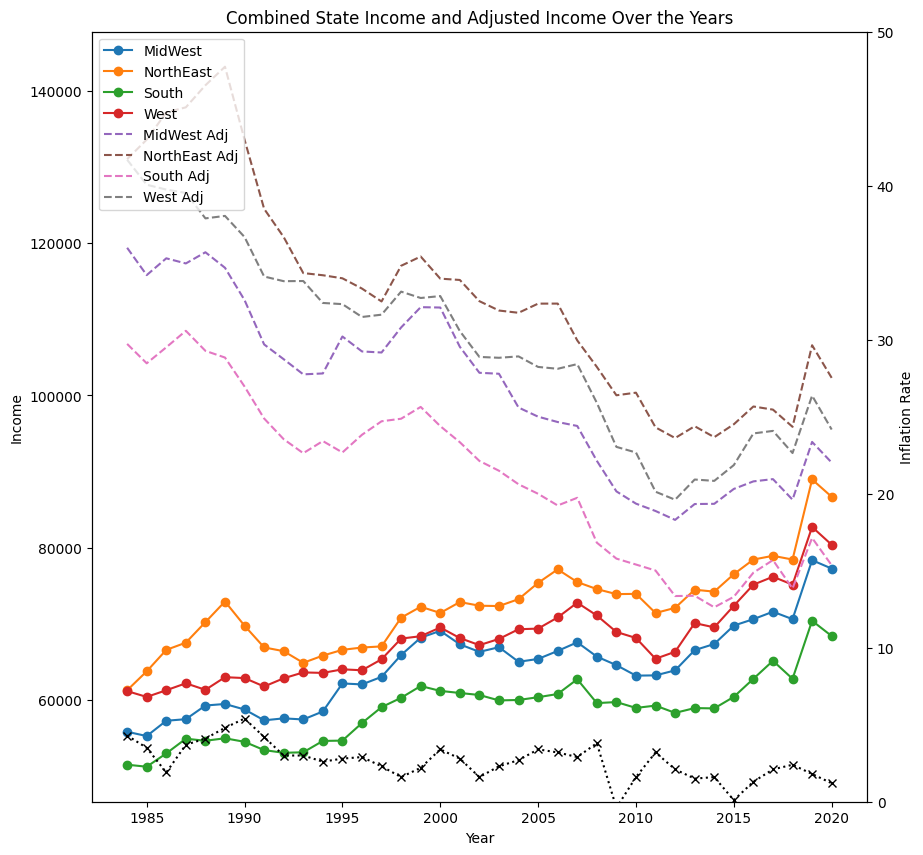

In [45]:
#Shows the breakdown of "buying power" in the past to current with the added factor of inflation.
fig_combined, ax_combined = plt.subplots(figsize=(10, 10))

# Plotting state incomes
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['MidWest'], label='MidWest', marker='o')
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['NorthEast'], label='NorthEast', marker='o')
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['South'], label='South', marker='o')
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['West'], label='West', marker='o')

# Plotting state adjusted incomes
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['MidWest Adj'], label='MidWest Adj', linestyle='--')
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['NorthEast Adj'], label='NorthEast Adj', linestyle='--')
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['South Adj'], label='South Adj', linestyle='--')
ax_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['West Adj'], label='West Adj', linestyle='--')

# Plotting interest rates on a secondary y-axis
ax2_combined = ax_combined.twinx()
ax2_combined.plot(combined_cleaned_df_transposed['Year'], combined_cleaned_df_transposed['Inflation Rate'], label='Inflation Rate', color='black', linestyle=':', marker='x')
ax2_combined.set_ylabel('Inflation Rate')
ax2_combined.set_ylim(0,50)

ax_combined.set_xlabel('Year')
ax_combined.set_ylabel('Income')
ax_combined.set_title('Combined State Income and Adjusted Income Over the Years')
ax_combined.legend(loc='upper left')

plt.show()

#### Actual vs Adjusted Income of the United States by Region: 
This graph shows the actual vs adjusted incomes of individuals in the United States by regions, Midwest, NorthEast, South, and West. 

Using the same time frame as the comparison above, we can look at the percent increase of income broken down by region compared to the inflation rate from 199-2008.

From the year 1995-2008:   
5.66% increase in average income in the MidWest,    
11.97% increase in average income in the NorthEast,    
9% increase in average income in the South,   
11.03% increase in average income in the West 


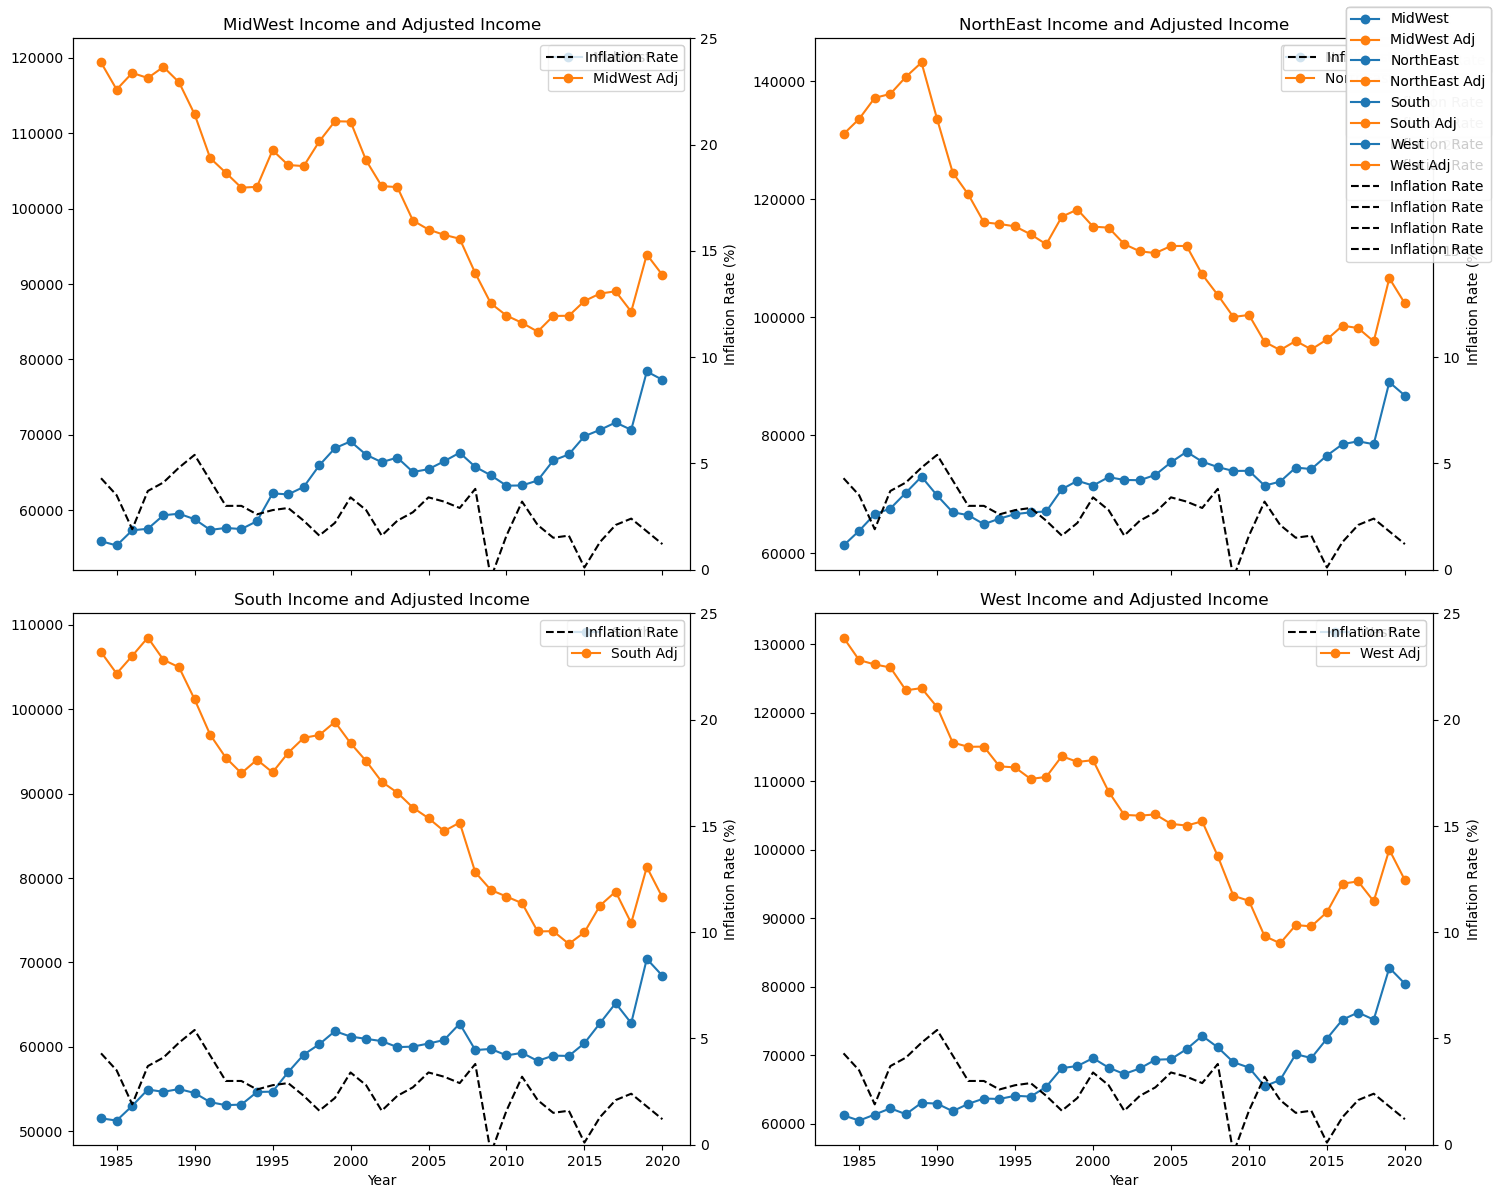

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12), sharex=True)

# Plotting function to add inflation rate
def plot_with_inflation(ax, x, y, inflation_rate):
    ax2 = ax.twinx()
    combined_cleaned_df_transposed.plot(x=x, y=y, ax=ax, marker='o')
    combined_cleaned_df_transposed.plot(x=x, y=inflation_rate, ax=ax2, linestyle='--', color='black', secondary_y=False)
    ax2.set_ylim(0, 25)  # Adjust this range as necessary to ensure the inflation rate shows lower
    ax2.set_ylabel('Inflation Rate (%)')
    ax2.set_xlabel('Years')
    ax.figure.legend(loc='upper right')

# MidWest
plot_with_inflation(axes[0, 0], 'Year', ['MidWest', 'MidWest Adj'], 'Inflation Rate')
axes[0, 0].set_title('MidWest Income and Adjusted Income')

# NorthEast
plot_with_inflation(axes[0, 1], 'Year', ['NorthEast', 'NorthEast Adj'], 'Inflation Rate')
axes[0, 1].set_title('NorthEast Income and Adjusted Income')

# South
plot_with_inflation(axes[1, 0], 'Year', ['South', 'South Adj'], 'Inflation Rate')
axes[1, 0].set_title('South Income and Adjusted Income')

# West
plot_with_inflation(axes[1, 1], 'Year', ['West', 'West Adj'], 'Inflation Rate')
axes[1, 1].set_title('West Income and Adjusted Income')

plt.tight_layout()
plt.show()

In [103]:
income_1995 = combined_cleaned_df_transposed[combined_cleaned_df_transposed['Year'] == 1995]
income_2008 = combined_cleaned_df_transposed[combined_cleaned_df_transposed['Year'] == 2008]

# Selecting non-adjusted regions for mapping
regions = ['MidWest', 'NorthEast', 'South', 'West']
percent_changes = {}

for region in regions:
    income_1995_value = income_1995[region].values[0]
    income_2008_value = income_2008[region].values[0]
    percent_change = ((income_2008_value - income_1995_value) / income_1995_value) * 100
    percent_changes[region] = percent_change

for region, percent_change in percent_changes.items():
    print(f"Percent change in {region} income from 1995 to 2008: {percent_change:.2f}%")

Percent change in MidWest income from 1995 to 2008: 5.66%
Percent change in NorthEast income from 1995 to 2008: 11.97%
Percent change in South income from 1995 to 2008: 9.00%
Percent change in West income from 1995 to 2008: 11.03%


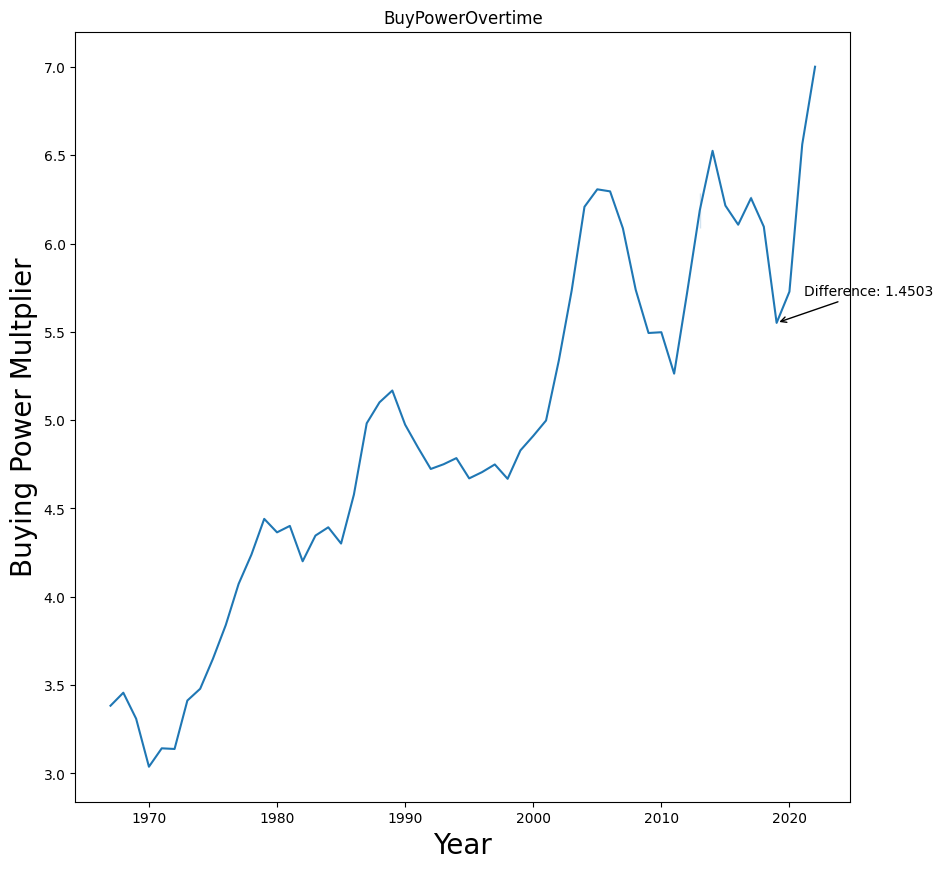

In [26]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.lineplot(x = income_US['Year'],y = income_US['buying_multiplier']).set_title('BuyPowerOvertime')
plt.ylabel('Buying Power Multplier', fontsize = 20)
plt.xlabel('Year',fontsize = 20)
point1_index = income_US[income_US['Year'] == 2019].index
point2_index = income_US[income_US['Year'] == 2022].index
difference = round(income_US['buying_multiplier'][point2_index].values[0]- income_US['buying_multiplier'][point1_index].values[0],4)
plt.annotate(f'Difference: {difference}', xy=(income_US['Year'].iloc[point1_index], income_US['buying_multiplier'].iloc[point1_index]), 
             xytext=(20, 20), textcoords='offset points', arrowprops=dict(arrowstyle='->'))

plt.show()

The above graph represents the buying power metric of the average american in the US. This essentially is saying, how many times more is the average house price compared to the averge salary. This metric makes a great insite into the health of the housing market. One major thing to note is the buying multiplier has increaded by 1.4503 just from 2019 alone. 

### Key Takeaway:
Housing prices are growing rappidly with no major decline in sight. This is due to several factors including interest rates, inflations, wage and the number of new homes being built. This all leads to have the buying power multiplier being at an all time high. Therefore it is harder than ever to by a house.

### Sources:
SaintLouis Fed: https://www.stlouisfed.org

Seaborn Documentation: https://seaborn.pydata.org